In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls '/content/drive/My Drive/Data'

bank		     bank.zip  mnist.zip  Task02_Heart	Task09_Spleen
bank-additional.zip  DAGM      SMART	  Task06_Lung


In [3]:
import nibabel as nib

In [4]:
img = nib.load('/content/drive/My Drive/Data/Task02_Heart/imagesTr/la_010.nii.gz')

In [5]:
img.shape

(320, 320, 120)

In [6]:
img_data = img.get_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


In [7]:
img_data.shape

(320, 320, 120)

In [8]:
import matplotlib.pyplot as plt

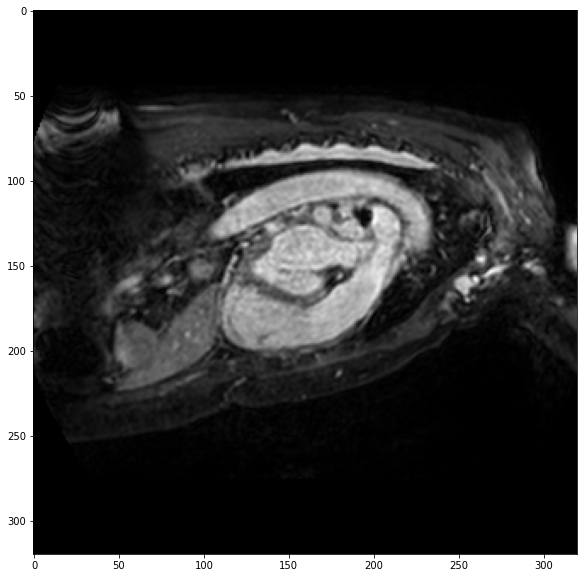

In [9]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img_data[:,:,50], cmap='gray')

In [10]:
lbl = nib.load('/content/drive/My Drive/Data/Task02_Heart/labelsTr/la_010.nii.gz')

In [11]:
lbl_data = lbl.get_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


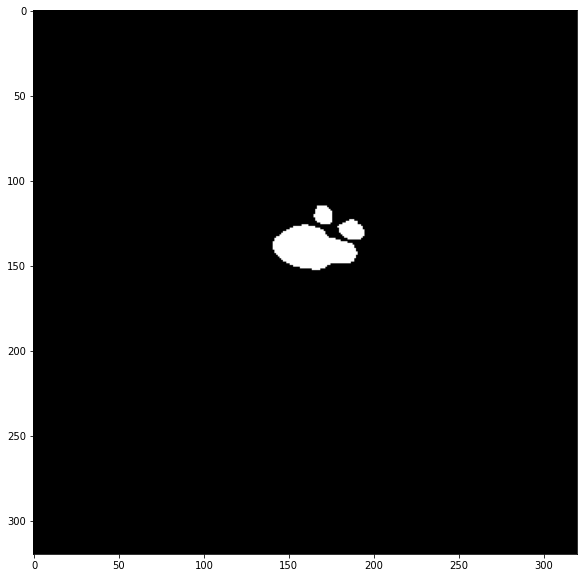

In [12]:
fig = plt.figure(figsize=(10,10))
plt.imshow(lbl_data[:,:,50], cmap='gray')

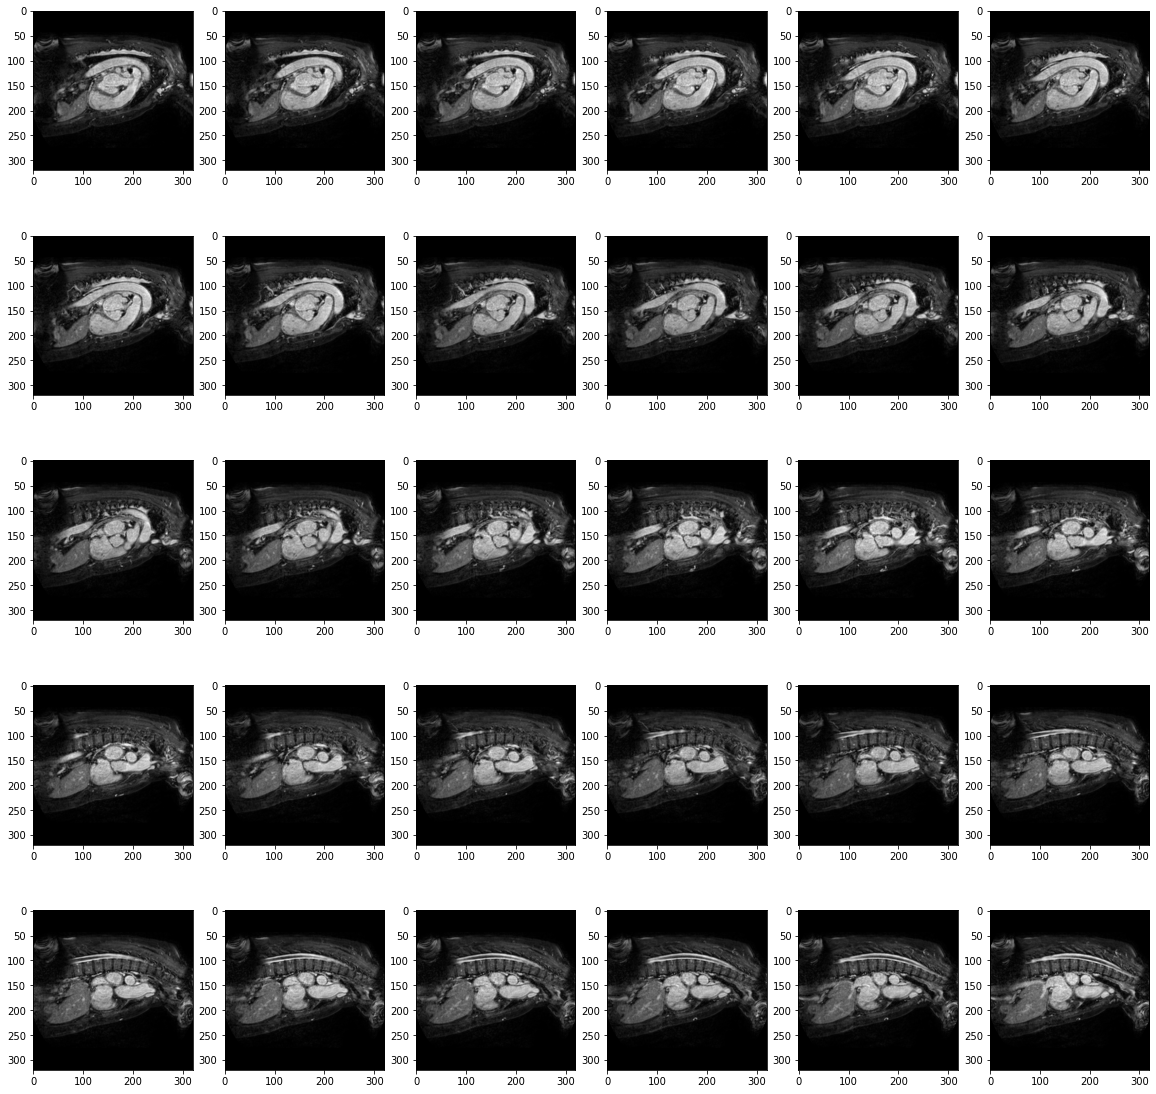

In [13]:
fig = plt.figure(figsize=(20,20))
for index in range(30):
    y = fig.add_subplot(5,6,index+1)
    y.imshow(img_data[:,:,index+50], cmap='gray')

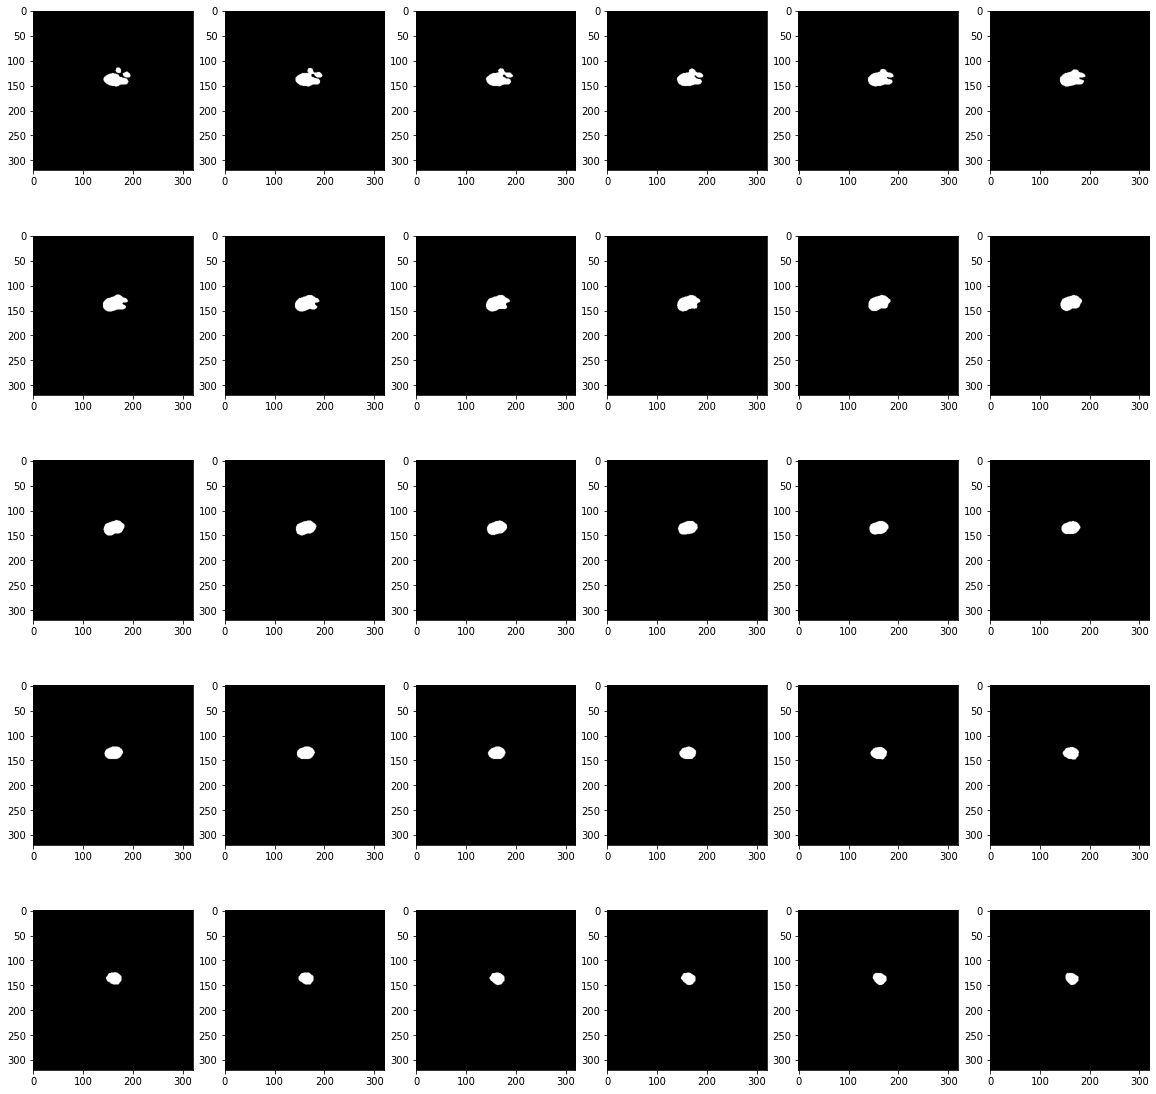

In [14]:
fig = plt.figure(figsize=(20,20))
for index in range(30):
    y = fig.add_subplot(5,6,index+1)
    y.imshow(lbl_data[:,:,index+50], cmap='gray')

In [15]:
import numpy as np
import ipywidgets as ipyw
import matplotlib.pyplot as plt
%matplotlib inline

class ImageSliceViewer3D:
    """ 
    ImageSliceViewer3D is for viewing volumetric image slices in jupyter or
    ipython notebooks. 
    
    User can interactively change the slice plane selection for the image and 
    the slice plane being viewed. 

    Argumentss:
    Volume = 3D input image
    figsize = default(8,8), to set the size of the figure
    cmap = default('plasma'), string for the matplotlib colormap. You can find 
    more matplotlib colormaps on the following link:
    https://matplotlib.org/users/colormaps.html
    
    """
    
    def __init__(self, volume, figsize=(8,8), cmap='gray'):
        self.volume = volume
        self.figsize = figsize
        self.cmap = cmap
        self.v = [np.min(volume), np.max(volume)]
        
        # Call to select slice plane
        ipyw.interact(self.view_selection, view=ipyw.RadioButtons(
            options=['x-y','y-z', 'z-x'], value='x-y', 
            description='Slice plane selection:', disabled=False,
            style={'description_width': 'initial'}))
    
    def view_selection(self, view):
        # Transpose the volume to orient according to the slice plane selection
        orient = {"y-z":[1,2,0], "z-x":[2,0,1], "x-y": [0,1,2]}
        self.vol = np.transpose(self.volume, orient[view])
        maxZ = self.vol.shape[2] - 1
        
        # Call to view a slice within the selected slice plane
        ipyw.interact(self.plot_slice, 
            z=ipyw.IntSlider(min=0, max=maxZ, step=1, continuous_update=False, 
            description='Image Slice:'))
        
    def plot_slice(self, z):
        # Plot slice for the given plane and slice
        self.fig = plt.figure(figsize=self.figsize)
        plt.imshow(self.vol[:,:,z], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])

In [16]:
from IPython import display
import time
def visual_inspection(img_df, time_sleep=0.1):
    for i in range(len(img_df[0,0,:])):
        plt.figure(figsize=(10, 10))
        plt.imshow(img_df[:,:,i], cmap='gray')
        #plt.title()
        display.clear_output(wait=True)
        plt.show()
        time.sleep(time_sleep)

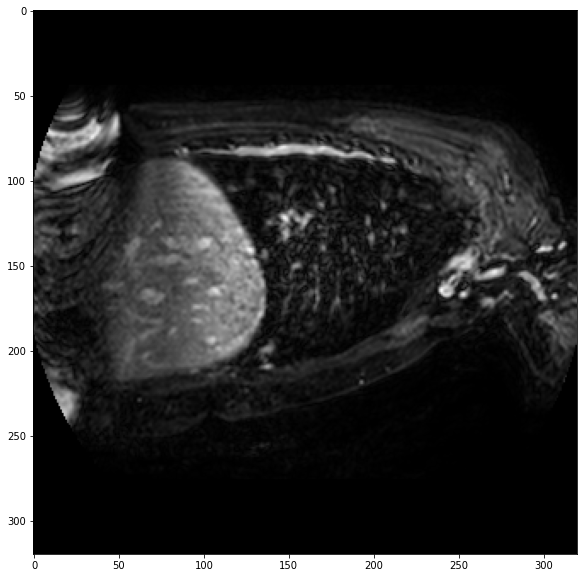

In [17]:
visual_inspection(img_data)

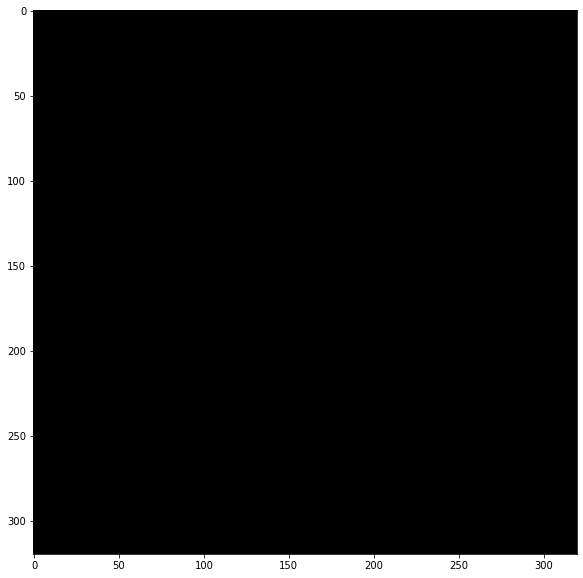

In [18]:
visual_inspection(lbl_data)

In [19]:
import glob
import os

In [26]:
import imageio
path_to_temp = '/content/drive/My Drive/Data/temp/'
def create_gif(img_df, duration, output):
    images = []
    for i in range(len(img_df[0,0,:])):
        plt.imsave(path_to_temp + str(i) + '.jpg', img_df[:,:,i], cmap='gray')
        images.append(imageio.imread(path_to_temp + str(i) + '.jpg'))
        
    filename = path_to_temp + output + '.gif'
    imageio.mimsave(filename, images, duration=duration)
    for jpg_file in glob.glob(path_to_temp + '*.jpg'):
        os.remove(jpg_file)

In [24]:
!mkdir temp

In [28]:
create_gif(img_data, duration=0.5, output='test')

In [29]:
img_data.shape

(320, 320, 120)

In [30]:
def collect_imgs_masks(img, lbl):
    img_X = np.ndarray((120, 320, 320, 1))
    mask_y = np.ndarray((120, 320, 320, 1))
    for index in range(120):
        img_X[index,:,:,0] = img[:,:,index]
        mask_y[index,:,:,0] = lbl[:,:,index]
    return img_X, mask_y

In [31]:
img_X, mask_y = collect_imgs_masks(img_data, lbl_data)

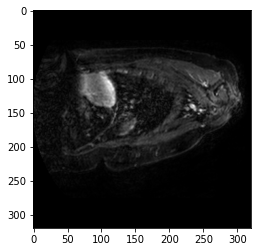

In [32]:
plt.imshow(img_X[0,:,:,0], cmap='gray')

In [33]:
import cv2
def inspect_img_mask(image, mask):
    '''
    '''
    # scale pred and mask's pixel range to 0~255
    mask = np.array(255*mask, dtype=np.uint8)    
    # transform both of them to rgb
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    rgb_mask[:,:,1:3] = 0*rgb_mask[:,:,1:2]
    #img_mask = cv2.addWeighted(image, 1, rgb_mask, 0.5, 1)    
    
    
    plt.figure(figsize=(20, 20))  
    plt.subplot(1,3,1)
    plt.imshow(image, cmap='gray')
    plt.title('Original image')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')
    #plt.subplot(1,3,3)
    #plt.imshow(img_mask)
    #plt.title('Mask on image')
    #plt.axis('off')

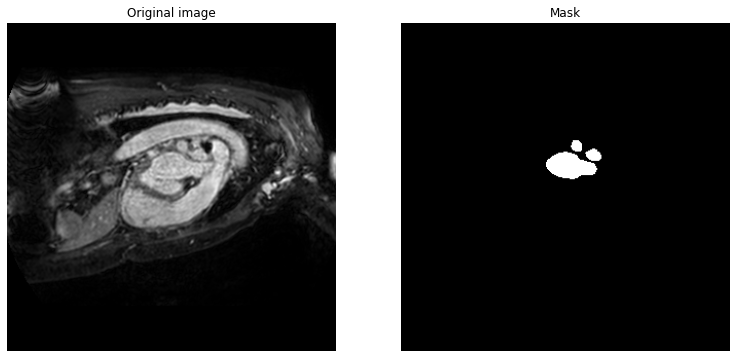

In [34]:
index = 50
inspect_img_mask(img_X[index,:,:,0], mask_y[index,:,:,0])

In [35]:
from sklearn.model_selection import train_test_split
img_X = img_X / 255.
X_train, X_test, y_train, y_test = train_test_split(img_X, mask_y, test_size=0.2, random_state=12)

In [37]:
from keras.models import Model
from keras.layers import Input, merge, Conv2D, MaxPooling2D, UpSampling2D,Lambda, Conv2DTranspose, concatenate, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from scipy.ndimage.measurements import label
import time

In [38]:
img_rows = 320
img_cols = 320

In [39]:
### Defining a small Unet
### Smaller Unet defined so it fits in memory

def get_small_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(64, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(32, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(16, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(16, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(8, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(8, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv9)
    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    model = Model(inputs=inputs, outputs=conv10)

    
    return model

In [40]:
model = get_small_unet()

In [41]:
### IOU or dice coeff calculation
def IOU_calc(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    
    return 2*(intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def IOU_calc_loss(y_true, y_pred):
    return -IOU_calc(y_true, y_pred)

In [42]:
smooth = 1.
model.compile(optimizer=Adam(lr=1e-4), loss=IOU_calc_loss, metrics=[IOU_calc])

In [43]:
history = model.fit(img_X, mask_y, batch_size=10, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 164ms/step - loss: -0.0097 - IOU_calc: 0.0099 - val_loss: -1.8917e-04 - val_IOU_calc: 1.5319e-04
Epoch 2/100
10/10 [==============================] - 1s 68ms/step - loss: -0.0102 - IOU_calc: 0.0099 - val_loss: -1.9780e-04 - val_IOU_calc: 1.6007e-04
Epoch 3/100
10/10 [==============================] - 1s 68ms/step - loss: -0.0107 - IOU_calc: 0.0105 - val_loss: -2.0599e-04 - val_IOU_calc: 1.6661e-04
Epoch 4/100
10/10 [==============================] - 1s 68ms/step - loss: -0.0112 - IOU_calc: 0.0108 - val_loss: -2.1399e-04 - val_IOU_calc: 1.7299e-04
Epoch 5/100
10/10 [==============================] - 1s 68ms/step - loss: -0.0116 - IOU_calc: 0.0115 - val_loss: -2.2075e-04 - val_IOU_calc: 1.7836e-04
Epoch 6/100
10/10 [==============================] - 1s 69ms/step - loss: -0.0119 - IOU_calc: 0.0114 - val_loss: -2.2530e-04 - val_IOU_calc: 1.8197e-04
Epoch 7/100
10/10 [==============================] - 1s 68ms/step - loss: -0.0121 - IOU

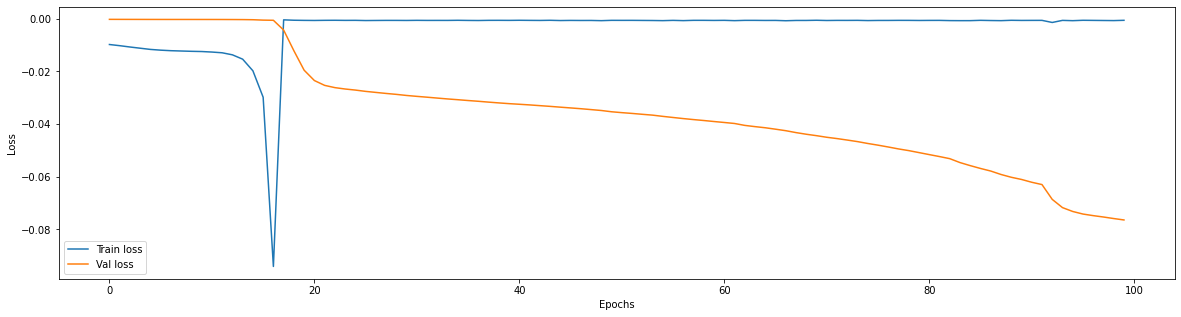

In [44]:
plt.figure(figsize=(20, 5))
plt.plot(model.history.history['loss'], label='Train loss')
plt.plot(model.history.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [45]:
predict = model.predict(X_test)

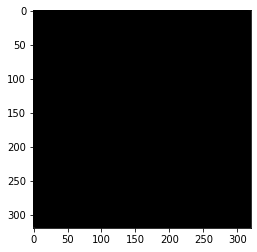

In [46]:
plt.imshow(predict[10,:,:,0], cmap='gray')

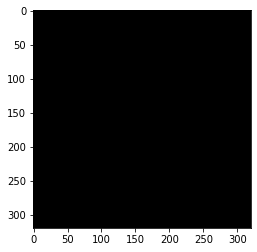

In [47]:
plt.imshow(y_test[10,:,:,0], cmap='gray')